In [3]:
# ignore if the module is installed in path
import sys
sys.path.append("../")

# import main module
from rppca import Design, randomized_svd

# numerical ingredients
import numpy as np
import pandas as pd
import scipy.io as io

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
AInv = io.mmread('../datasets/pedAInv.mtx')
LInv = io.mmread('../datasets/pedLInv.mtx')
pop_label = pd.read_csv('../datasets/popLabel.csv').x

In [12]:
type(AInv)

scipy.sparse._coo.coo_matrix

In [10]:
type(AInv.toarray())

numpy.ndarray

In [14]:
AInv.toarray()

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 6.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 5.35493216, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 5.63416171,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        5.44374897]])

In [5]:
# naive SVD
%time A = np.linalg.inv(AInv.toarray())
%time u, s, v = np.linalg.svd(A, full_matrices=False)

CPU times: user 2.13 s, sys: 101 ms, total: 2.23 s
Wall time: 337 ms
CPU times: user 35.5 s, sys: 2.03 s, total: 37.5 s
Wall time: 4.86 s


In [6]:
# new implementation
%time design = Design(LInv.tocsc())
%time U, S, V = randomized_svd(design, n_components=10, n_iter=5, seed=0)

CPU times: user 1.06 ms, sys: 1.12 ms, total: 2.18 ms
Wall time: 1.17 ms
CPU times: user 84.2 ms, sys: 5.06 ms, total: 89.3 ms
Wall time: 22.3 ms


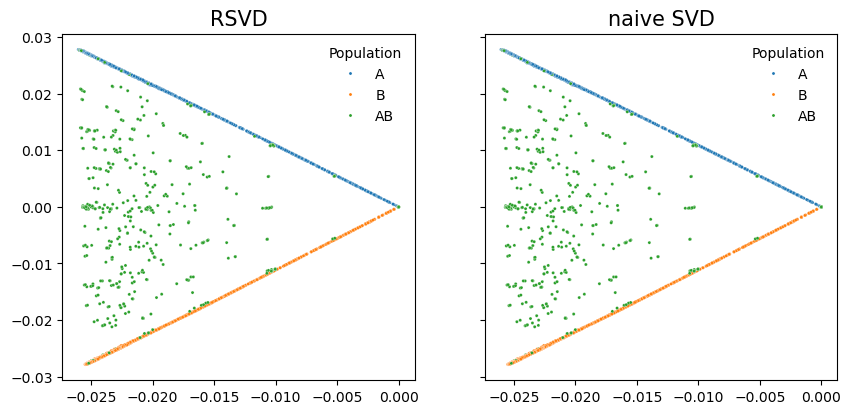

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10,4.5), sharex=True, sharey=True)

# RSVD 
ax[0].set_title('RSVD', fontsize=15)
sns.scatterplot(x=U[:,0], y=U[:,1], s=5, hue=pop_label, ax=ax[0])

# naive SVD
ax[1].set_title('naive SVD', fontsize=15)
sns.scatterplot(x=u[:,0], y=u[:,1], s=5, hue=pop_label, ax=ax[1])

ax[0].legend(title='Population', frameon=False)
ax[1].legend(title='Population', frameon=False)

plt.show()

In [20]:
Lc=LInv.tocsc()

In [48]:
La = LInv.toarray()

In [32]:
vect = np.random.normal(size=2600)

In [47]:
np.array([vect])

array([[-0.57504479,  0.2946202 , -0.74433042, ..., -0.38709033,
        -0.28049783,  1.35068393]])

In [61]:
%time vect * Lc

CPU times: user 1.07 ms, sys: 283 μs, total: 1.35 ms
Wall time: 1.25 ms


array([-0.57504479,  0.2946202 , -4.40234972, ..., -0.89575514,
       -0.66580056,  3.15139454])

In [62]:
%time vect @ La

CPU times: user 46.7 ms, sys: 506 μs, total: 47.2 ms
Wall time: 12.7 ms


array([-0.57504479,  0.2946202 , -4.40234972, ..., -0.89575514,
       -0.66580056,  3.15139454])

In [64]:
%time np.transpose(np.array([vect])) * La

CPU times: user 11.9 ms, sys: 11 ms, total: 22.9 ms
Wall time: 19 ms


array([[-0.57504479, -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.2946202 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        , -0.74433042, ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , ..., -0.89575514,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.66580056, -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.15139454]])

In [65]:
%time np.transpose(vect) * La

CPU times: user 12 ms, sys: 10.3 ms, total: 22.3 ms
Wall time: 18.4 ms


array([[-0.57504479,  0.        , -0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [-0.        ,  0.2946202 , -0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [-0.        ,  0.        , -0.74433042, ..., -0.        ,
        -0.        ,  0.        ],
       ...,
       [-0.        ,  0.        , -0.        , ..., -0.89575514,
        -0.        ,  0.        ],
       [-0.        ,  0.        , -0.        , ..., -0.        ,
        -0.66580056,  0.        ],
       [-0.        ,  0.        , -0.        , ..., -0.        ,
        -0.        ,  3.15139454]])

In [66]:
%time np.transpose(np.array([vect])) @ La

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2600 is different from 1)

In [73]:
%time np.transpose(vect) * Lc 

CPU times: user 423 μs, sys: 180 μs, total: 603 μs
Wall time: 538 μs


array([-0.57504479,  0.2946202 , -4.40234972, ..., -0.89575514,
       -0.66580056,  3.15139454])

In [74]:
%time np.transpose(vect) @ Lc 

CPU times: user 654 μs, sys: 330 μs, total: 984 μs
Wall time: 817 μs


array([-0.57504479,  0.2946202 , -4.40234972, ..., -0.89575514,
       -0.66580056,  3.15139454])

In [80]:
%time Lc @ vect 

CPU times: user 369 μs, sys: 196 μs, total: 565 μs
Wall time: 491 μs


array([-0.57504479,  0.2946202 , -0.74433042, ..., -3.97143575,
       -1.68432169,  2.5944037 ])

In [28]:
%time Lc * Lc

CPU times: user 1.09 ms, sys: 451 μs, total: 1.54 ms
Wall time: 966 μs


<2600x2600 sparse matrix of type '<class 'numpy.float64'>'
	with 16108 stored elements in Compressed Sparse Column format>